In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,roc_curve,roc_auc_score,auc,confusion_matrix,recall_score

In [37]:
data = load_svmlight_file('train-v3-compact.txt')
X,y=data[0],data[1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [49]:
rfc=RandomForestClassifier(n_estimators=300,max_depth=None,n_jobs=-1,verbose=1,oob_score=True)

In [50]:
rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 80.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 120.8min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=True, random_state=None, verbose=1, warm_start=False)

In [51]:
rfc.oob_score_

0.5777531978808682

In [52]:
y_test_pred=rfc.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   28.3s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:   47.5s finished


In [53]:
confusion_matrix(y_test,y_test_pred)

array([[81103, 37640],
       [50636, 40627]])

In [54]:
#print(precision_score(y_train,y_train_pred))
print(precision_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

0.6156339428718907
0.6830128933916104


In [24]:
import numpy as np

In [55]:
np.unique(y_test,return_counts=True)

(array([1., 2.]), array([118743,  91263]))

In [26]:
np.unique(y_test_pred,return_counts=True)

(array([1., 2.]), array([26197, 16172]))

In [56]:
data = load_svmlight_file('train-v3.txt')
X,y=data[0],data[1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [119]:
rfc=RandomForestClassifier(n_estimators=1000,max_depth=15,n_jobs=-1,verbose=1,oob_score=True)

In [120]:
rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  7.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=None, verbose=1, warm_start=False)

In [121]:
rfc.oob_score_

0.6367864460462193

In [122]:
y_test_pred=rfc.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   12.1s finished


In [123]:
print(np.unique(y_test,return_counts=True))
print(np.unique(y_test_pred,return_counts=True))

(array([1., 2.]), array([118527,  91479]))
(array([1., 2.]), array([184776,  25230]))


In [124]:
#print(precision_score(y_train,y_train_pred))
print(precision_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

0.613245226652812
0.9560100230327268


In [125]:
confusion_matrix(y_test,y_test_pred).T

array([[113313,  71463],
       [  5214,  20016]])

In [126]:
prob=rfc.predict_proba(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    8.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   10.8s finished


In [127]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [142]:
y_test_conv=y_test
y_test_conv[y_test_conv==2]=0
roc_auc_score(y_test_conv,prob[:,0])

0.7759380494654737

In [143]:
fpr,tpr,thresholds=roc_curve(y_test_conv,prob[:,0])

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

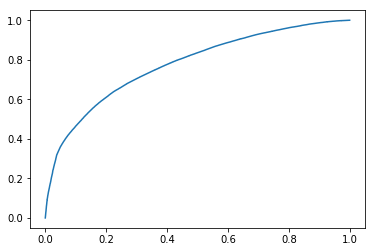

In [146]:
plt.plot(fpr,tpr)

In [147]:
from sklearn.metrics import precision_recall_curve

In [148]:
precision, recall, threshold = precision_recall_curve(y_test_conv,prob[:,0])

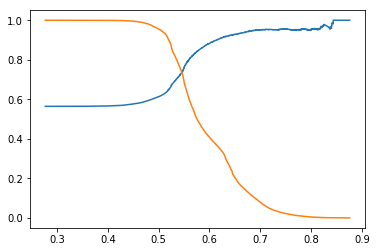

In [149]:
plt.plot(threshold,precision[:-1])
plt.plot(threshold,recall[:-1])

In [150]:
np.unique(y_test_conv,return_counts=True)

(array([0., 1.]), array([ 91479, 118527]))

In [158]:
y_test_pred_new=np.zeros(y_test_conv.shape)
y_test_pred_new[prob[:,0]>.55]=1
np.unique(y_test_pred_new,return_counts=True)

(array([0., 1.]), array([102202, 107804]))

In [159]:
confusion_matrix(y_test,y_test_pred_new)

array([[65579, 25900],
       [36623, 81904]])

In [160]:
print(precision_score(y_test,y_test_pred_new))
print(recall_score(y_test,y_test_pred_new))

0.759749174427665
0.6910155491997604


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression()

In [34]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
y_test_pred_lr=lr.predict(X_test)

In [36]:
np.unique(y_test_pred_lr,return_counts=True)

(array([1., 2.]), array([41730,   639]))